
Mean images in each category
airplane


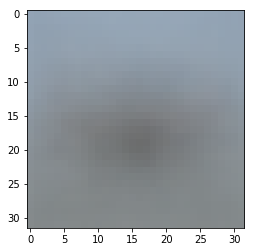

automobile


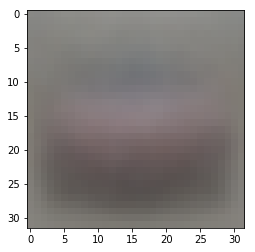

bird


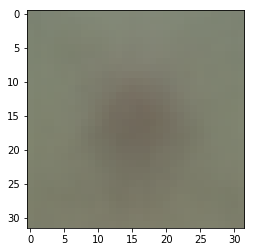

cat


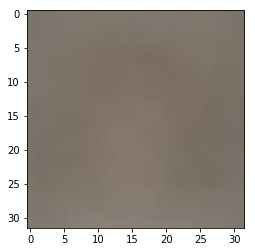

deer


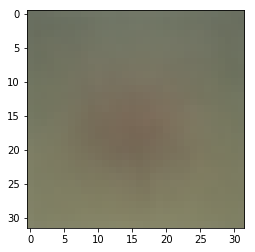

dog


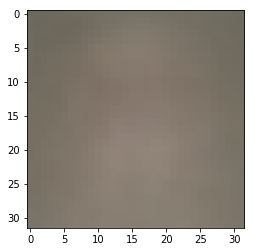

frog


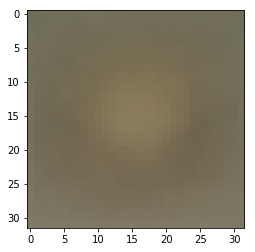

horse


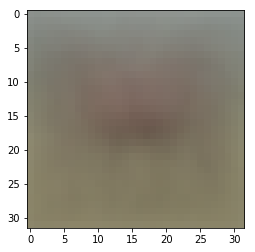

ship


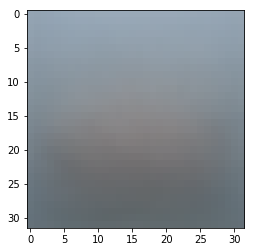

truck


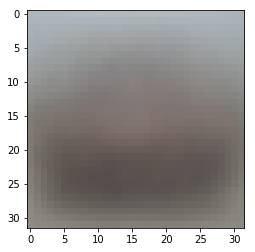


Plot of error when using PCA 20


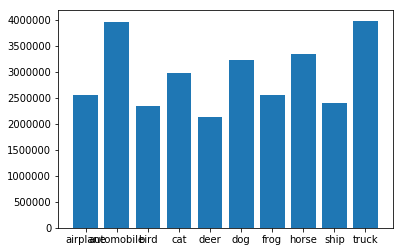


Mean distance


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1716.000291,1634.466886,1942.942099,2174.873100,2043.993640,2528.529810,1673.030185,913.484537,1460.201698
1,1716.000291,0.000000,880.387983,989.228487,1155.726611,1232.458924,1239.043179,933.950213,1310.734527,1067.291900
2,1634.466886,880.387983,0.000000,547.998175,615.511982,744.388340,976.585378,458.776634,1539.912985,1513.368098
3,1942.942099,989.228487,547.998175,0.000000,493.113577,420.406946,699.521980,661.664568,1828.313977,1760.470676
4,2174.873100,1155.726611,615.511982,493.113577,0.000000,591.848798,521.474832,751.326161,2065.658007,1957.702735
5,2043.993640,1232.458924,744.388340,420.406946,591.848798,0.000000,821.911796,927.264795,1951.226281,2029.851965
6,2528.529810,1239.043179,976.585378,699.521980,521.474832,821.911796,0.000000,1049.837606,2299.996304,2087.539221
7,1673.030185,933.950213,458.776634,661.664568,751.326161,927.264795,1049.837606,0.000000,1610.532210,1396.714359
8,913.484537,1310.734527,1539.912985,1828.313977,2065.658007,1951.226281,2299.996304,1610.532210,0.000000,1053.656016
9,1460.201698,1067.291900,1513.368098,1760.470676,1957.702735,2029.851965,2087.539221,1396.714359,1053.656016,0.000000



2D Map


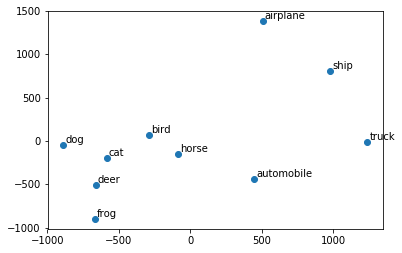

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
import os
import sys

%matplotlib inline

cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class Hw3:
    
    X = [None]*10
    X_mean = [None]*10
    X_centered = [None]*10
    X_pca = [None]*10
    pca_err = [None]*10
    similarities = None
    
    def __init__(self):
        self.load()
        
    def unpickle(self, file):
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    def load(self):
        
        meta = self.unpickle("cifar-10-batches-py/batches.meta")
        X = pd.DataFrame()
        Y = pd.DataFrame()
        # use range(1,2) when developing (faster), range(1,6) for full data
        for i in range(1,2):
            data = self.unpickle("cifar-10-batches-py/data_batch_" + str(i))
            X = pd.concat([X, pd.DataFrame(data[b'data']).astype('float32')])
            Y = pd.concat([Y, pd.DataFrame(data[b'labels'])])
        
        X['label'] = Y
        X_groups = X.groupby('label')
        for i in range(0,10):
            self.X[i] = X_groups.get_group(i).drop('label', axis=1).reset_index(drop=True)
            self.X_mean[i] = self.X[i].mean().astype('uint8')
    
    def draw(self, xi):
        img = xi.values.astype('uint8')
        plt.imshow(np.dstack((img[0:1024].reshape(32,32), img[1024:2048].reshape(32,32), img[2048:3072].reshape(32,32))))
        plt.show()
    
    def drawMean(self, label):
        print (cifar_labels[label])
        self.draw(self.X_mean[label])
        
    def computePCA(self, label):
        pca = PCA(n_components=3072)
        self.X_centered[label] = self.X[label] - np.mean(self.X[label], axis=0)
        pca.fit(self.X_centered[label])
        self.X_pca[label] = pca        
        
    def part1_draw_mean(self):
        for i in range(0,10):
            self.drawMean(i)
            
    def part1_compute_pca(self):
        for i in range(0,10):
            self.computePCA(i)        
            
    def part1_calculate_error(self):
        for i in range(0,10):
            components = self.X_pca[i].transform(self.X_centered[i])
            inv = self.X_pca[i].inverse_transform(components)
            var = self.X_pca[i].explained_variance_
            varDF = pd.DataFrame(var)
            varPlot = var[20:3071]
            varPlot = pd.DataFrame(varPlot)
            sumVar = sum(varPlot.values)
            self.pca_err[i] = int(sumVar[0])        
            
    def part1_plot_error(self):
        global cifar_labels
        plt.figure()
        plt.bar(cifar_labels, self.pca_err)
        plt.show()
                
    def part2_mean_distances(self):
        self.similarities = euclidean_distances(self.X_mean)
        display(pd.DataFrame(self.similarities))
        
    def part2_2d_map(self):
        global cifar_labels
        mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=10, dissimilarity="precomputed", n_jobs=1)
        pos = mds.fit(self.similarities).embedding_
        plt.figure()
        plt.scatter(pos[:,0], pos[:,1])
        for i in range (0,10):
            xy=(pos[i][0]+15,pos[i][1]+25)
            plt.annotate(cifar_labels[i],xy)
        plt.show()        

hw = Hw3()
print("\nMean images in each category")
hw.part1_draw_mean()
hw.part1_compute_pca()
hw.part1_calculate_error()
print("\nPlot of error when using PCA 20")
hw.part1_plot_error()

print("\nMean distance")
hw.part2_mean_distances()

print("\n2D Map")
hw.part2_2d_map()
